<a href="https://colab.research.google.com/github/fahammed2022/Classification-and-Regression/blob/main/Optimization%20of%20Supply%20Chain%20Routes/Optimization_of_Supply_Chain_Routes_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Optimization of Supply Chain Routes using Machine Learning and Deep Learning Algorithm

In [33]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load and prepare the data

In [34]:
# Read the dataset
dataset_path = "/content/Transportation_data_updated.csv"
Dataset = pd.read_csv(dataset_path)

# Display first 5 rows of the dataset
print(Dataset.head())

   Distance TransportationMode WeatherConditions TrafficConditions  \
0     152.0               Ship             Rainy               Low   
1     485.0                Air             Snowy            Medium   
2     398.0              Truck             Snowy              High   
3     320.0              Truck             Snowy            Medium   
4     156.0              Truck             Snowy            Medium   

   FuelPrices  DeliveryTime TransportationCompany  TransportationCost  
0    3.339509          22.0             Company C               228.0  
1    2.804746          23.0             Company B              2425.0  
2    2.596014           3.0             Company A               796.0  
3    3.250956          16.0             Company B               640.0  
4    2.309715          15.0             Company C               312.0  


## Data Preprocessing

In [35]:
# Check for missing values
print(Dataset.isnull().sum())

Distance                 3
TransportationMode       0
WeatherConditions        0
TrafficConditions        0
FuelPrices               1
DeliveryTime             1
TransportationCompany    0
TransportationCost       0
dtype: int64


In [36]:
# Handle missing values (Replacing the missing value with the average or mean value)
Misisng_value_columns = ['Distance', 'FuelPrices', 'DeliveryTime']
for column in Misisng_value_columns:
    Dataset[column].fillna(Dataset[column].mean(), inplace=True)


# Categorical Columns for encoding
Categorical_columns = ['TransportationMode', 'WeatherConditions', 'TrafficConditions', 'TransportationCompany']

# Encode Feature variables
encoder = LabelEncoder()
for column in Categorical_columns:
    Dataset[column] = encoder.fit_transform(Dataset[column])

print(Dataset.head())

   Distance  TransportationMode  WeatherConditions  TrafficConditions  \
0     152.0                   1                  0                  1   
1     485.0                   0                  1                  2   
2     398.0                   2                  1                  0   
3     320.0                   2                  1                  2   
4     156.0                   2                  1                  2   

   FuelPrices  DeliveryTime  TransportationCompany  TransportationCost  
0    3.339509          22.0                      2               228.0  
1    2.804746          23.0                      1              2425.0  
2    2.596014           3.0                      0               796.0  
3    3.250956          16.0                      1               640.0  
4    2.309715          15.0                      2               312.0  


## Visualize the distribution of transportation costs

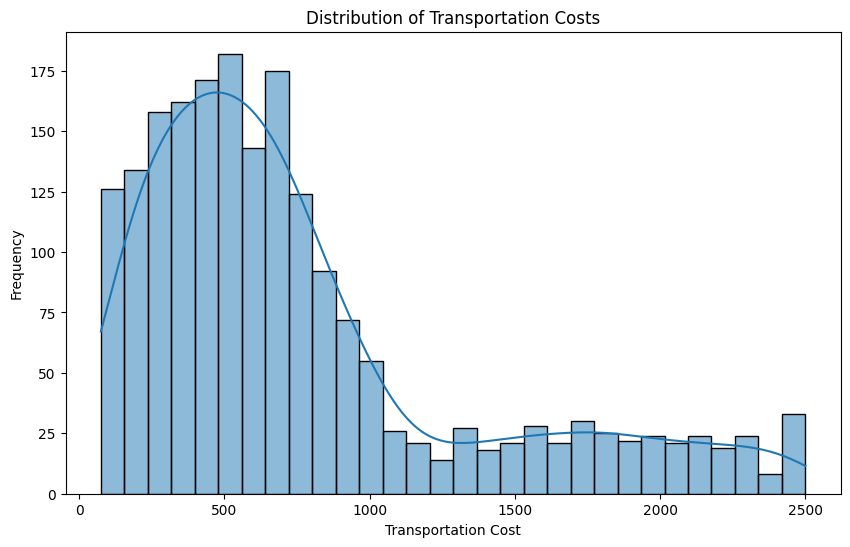

In [37]:
# Distribution of Transportation Costs
plt.figure(figsize=(10, 6))
sns.histplot(Dataset['TransportationCost'], bins=30, kde=True)
plt.title('Distribution of Transportation Costs')
plt.xlabel('Transportation Cost')
plt.ylabel('Frequency')
plt.show()

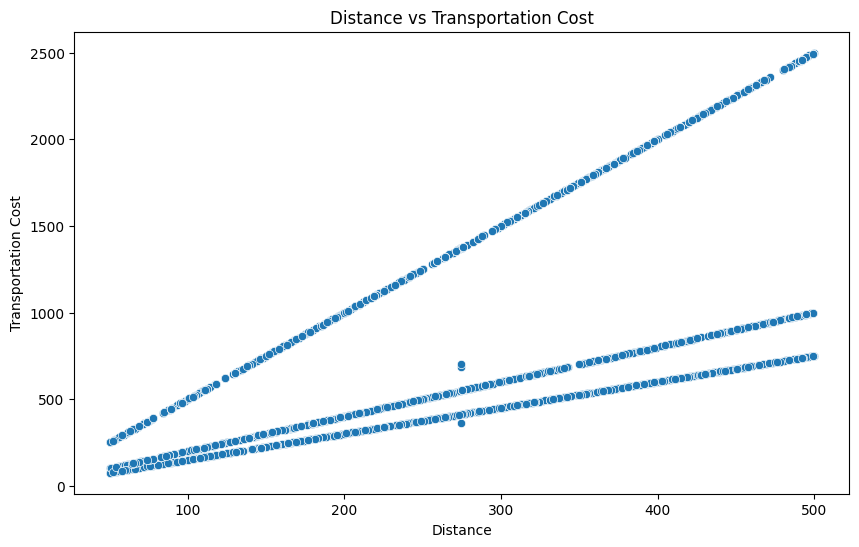

In [38]:
# Relationship between Distance and Transportation Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='TransportationCost', data=Dataset)
plt.title('Distance vs Transportation Cost')
plt.xlabel('Distance')
plt.ylabel('Transportation Cost')
plt.show()

In [39]:
# Features and Target Variable
Target = Dataset['TransportationCost']  # Target Column
Features = Dataset.drop(['TransportationCost'], axis=1)  # Features Column

# Split the dataset into Traning and Test
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [41]:
# Model Development
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 269.2062050250589
Root Mean Squared Error: 321.33046647602


## Deep Learning Model

13/13 [==============================] - 0s 2ms/step
Mean Absolute Error: 56.69410535812378
Root Mean Squared Error: 69.7202671055467


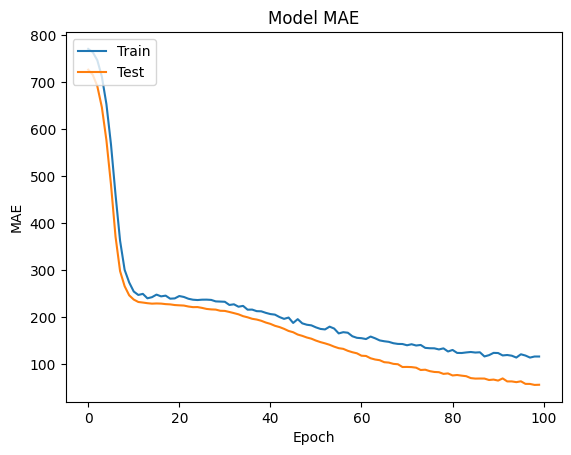

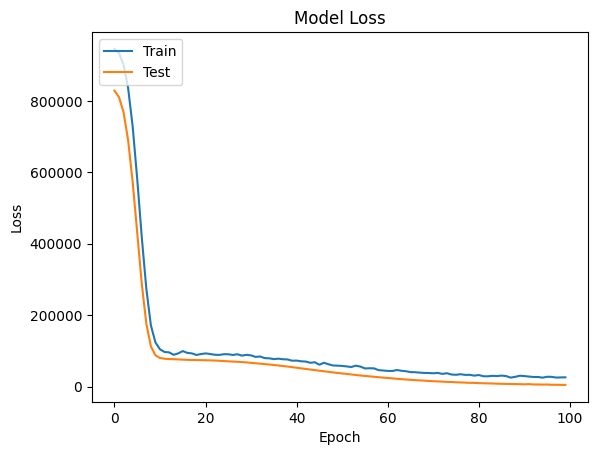

In [44]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Features and Target Variable
Target = Dataset['TransportationCost']  # Target Column
Features = Dataset.drop(['TransportationCost'], axis=1)  # Features Column

# Split the dataset into Training and Test
Features_Training, Features_Test, Target_Training, Target_Test = train_test_split(Features, Target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
Features_Training = scaler.fit_transform(Features_Training)
Features_Test = scaler.transform(Features_Test)

# Build the Neural Network Architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(Features_Training.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Train the Model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

history = model.fit(Features_Training, Target_Training, epochs=100, batch_size=32,
                    validation_data=(Features_Test, Target_Test), verbose=0)

# Predictions
y_pred = model.predict(Features_Test)

# Model Evaluation
mae = mean_absolute_error(Target_Test, y_pred)
rmse = np.sqrt(mean_squared_error(Target_Test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting Training and Validation Accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
